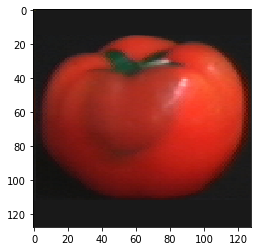

In [199]:
import numpy as np
from numpy import histogram as hist
import imageio
import matplotlib.pyplot as plt

path =  r".\query\obj4__40.png"
plt.imshow(imageio.imread(path))

In [166]:
img = imageio.imread(path, as_gray = True)
hist_, bins = hist(img, 10)
print(hist_)
print(bins)

[7062 1784 2089 2682 1464  902  315   52   25    9]
[ 15.544     34.1153    52.6866    71.257904  89.8292   108.400505
 126.9718   145.5431   164.11441  182.6857   201.257   ]


In [169]:
def normalized_hist(img_gray, num_bins):
    assert len(img_gray.shape) == 2, 'image dimension mismatch'
    assert img_gray.dtype == 'float', 'incorrect image type'

    flattened = [pix for dim in img_gray for pix in dim]
    min_interval = min(flattened) - 0.00000001
    max_interval = max(flattened) + 0.00000001
    
    bin_size = (max_interval-min_interval)/num_bins
    bin_hist = {min_interval:0}
    
    previous = min_interval
    for i in range(num_bins):
        bin_ = previous + bin_size
        bin_hist[bin_] = 0
        previous = bin_
    print(bin_hist)
    
    keys = list(bin_hist.keys())
    for pix in flattened:
        for i in range(len(bin_hist)):
            if keys[i-1]<= pix < keys[i]:
                bin_hist[keys[i-1]] += 1

    hists = list(bin_hist.values())
    hists.pop()
    bins = list(bin_hist.keys())
    return hists/np.sum(hists), [round(bin_,3) for bin_ in bins]

In [170]:
normalized_hist(np.array(img, "float"), 10)

{15.543999661936034: 0, 34.115300075160405: 0, 52.68660048838477: 0, 71.25790090160913: 0, 89.8292013148335: 0, 108.40050172805786: 0, 126.97180214128223: 0, 145.5431025545066: 0, 164.11440296773097: 0, 182.68570338095535: 0, 201.25700379417972: 0}


(array([0.43103027, 0.10888672, 0.12750244, 0.16369629, 0.08935547,
        0.05505371, 0.01922607, 0.00317383, 0.00152588, 0.00054932]),
 [15.544,
  34.115,
  52.687,
  71.258,
  89.829,
  108.401,
  126.972,
  145.543,
  164.114,
  182.686,
  201.257])

In [138]:
img = imageio.imread(path)

In [145]:
def rgb_hist(img_color_double, num_bins):
    assert len(img_color_double.shape) == 3, 'image dimension mismatch'
    assert img_color_double.dtype == 'float', 'incorrect image type'
    
    flattened = [pix for dim in img_color_double for pix in dim]
    pixels = [el for array in flattened for el in array]
    min_interval = min(pixels) - 0.00000001
    max_interval = max(pixels) + 0.00000001
    
    bin_size = (max_interval-min_interval)/num_bins
    bin_hist = {min_interval:0}
    
    previous = min_interval
    for i in range(num_bins):
        bin_ = previous + bin_size
        bin_hist[bin_] = 0
        previous = bin_

    #Define a 3D histogram  with "num_bins^3" number of entries
    hists = np.zeros((num_bins, num_bins, num_bins))
    # Loop for each pixel i in the image 
    keys = list(bin_hist.keys())
    for i in range(img_color_double.shape[0]*img_color_double.shape[1]):
        # Increment the histogram bin which corresponds to the R,G,B value of the pixel i
            rgb = [0,0,0]
            for k in range(len(bin_hist)):
                if keys[k-1] <= flattened[i][0] < keys[k]:
                    rgb[0] = k-1
                if keys[k-1] <= flattened[i][1] < keys[k]:
                    rgb[1] = k-1
                if keys[k-1] <= flattened[i][2] < keys[k]:
                    rgb[2] = k-1
                    
            hists[rgb[0],rgb[1],rgb[2]] += 1

    #Normalize the histogram such that its integral (sum) is equal 1
    hists = hists/np.sum(hists)
    #Return the histogram as a 1D vector
    hists = hists.reshape(hists.size)
    return hists

In [146]:
rgb_hist(np.array(img, "float"), 10)

array([9.81445312e-02, 3.54003906e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.91748047e-02, 1.51977539e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [147]:
#  Compute the *joint* histogram for the R and G color channels in the image
#  The histogram should be normalized so that sum of all values equals 1
#  Assume that values in each channel vary between 0 and 255
#
#  img_color - input color image
#  num_bins - number of bins used to discretize each channel, total number of bins in the histogram should be num_bins^2
#
#  E.g. hists[0,9] contains the number of image_color pixels such that:
#       - their R values fall in bin 0
#       - their G values fall in bin 9
def rg_hist(img_color_double, num_bins):
    assert len(img_color_double.shape) == 3, 'image dimension mismatch'
    assert img_color_double.dtype == 'float', 'incorrect image type'
    
    flattened = [pix for dim in img_color_double for pix in dim]
    pixels = [el for array in flattened for el in array]
    min_interval = min(pixels) - 0.00000001
    max_interval = max(pixels) + 0.00000001
    
    bin_size = (max_interval-min_interval)/num_bins
    bin_hist = {min_interval:0}
    
    previous = min_interval
    for i in range(num_bins):
        bin_ = previous + bin_size
        bin_hist[bin_] = 0
        previous = bin_

    #Define a 2D histogram  with "num_bins^2" number of entries
    hists = np.zeros((num_bins, num_bins))
    
    keys = list(bin_hist.keys())
    for i in range(img_color_double.shape[0]*img_color_double.shape[1]):
        # Increment the histogram bin which corresponds to the R,G,B value of the pixel i
        rg = [0,0]
        for k in range(len(bin_hist)):
            if keys[k-1] <= flattened[i][0] < keys[k]:
                rg[0] = k-1
            if keys[k-1] <= flattened[i][1] < keys[k]:
                rg[1] = k-1
                    
        hists[rg[0],rg[1]] += 1
    #Normalize the histogram such that its integral (sum) is equal 1
    hists = hists/np.sum(hists)
    #Return the histogram as a 1D vector
    hists = hists.reshape(hists.size)

    return hists

In [148]:
rg_hist(np.array(img, "float"), 10)

array([1.01684570e-01, 4.43725586e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.96728516e-03, 2.07580566e-01,
       2.92968750e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.44140625e-04, 4.45556641e-03, 4.04052734e-02, 1.89208984e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.10351562e-05, 2.44140625e-04,
       4.88281250e-03, 5.34667969e-02, 4.33349609e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.10351562e-05, 8.54492188e-04, 4.69970703e-03,
       7.91015625e-02, 8.66699219e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.27246094e-04, 1.03759766e-03, 2.44140625e-03, 7.80029297e-02,
      

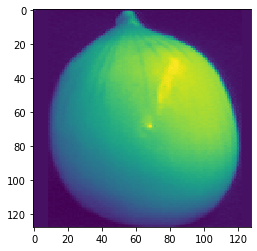

In [149]:
from skimage import color
from skimage import io

img = color.rgb2gray(io.imread(path))
plt.imshow(img)

In [150]:
import gauss_module

In [155]:
#  Compute the *joint* histogram of Gaussian partial derivatives of the image in x and y direction
#  Set sigma to 3.0 and cap the range of derivative values is in the range [-6, 6]
#  The histogram should be normalized so that sum of all values equals 1
#
#  img_gray - input gray value image
#  num_bins - number of bins used to discretize each dimension, total number of bins in the histogram should be num_bins^2
#
#  Note: you may use the function gaussderiv from the Filtering exercise (gauss_module.py)
def dxdy_hist(img_gray, num_bins):
    assert len(img_gray.shape) == 2, 'image dimension mismatch'
    assert img_gray.dtype == 'float', 'incorrect image type'
    
    
    min_interval = -6
    max_interval = 6
    
    derivx, derivy = gauss_module.gaussderiv(img, 3)
    derivx = np.clip(derivx, min_interval, max_interval)
    derivy = np.clip(derivy, min_interval, max_interval) 
        
    stacked = np.array(list(zip(derivx.reshape(-1), derivy.reshape(-1))))
    bin_size = (max_interval - min_interval)/num_bins
    
    bins = [-6 for _ in range(num_bins+1)]
    previous = min_interval
    for i in range(num_bins):
        bin_ = previous + bin_size
        bins[i+1] = bin_
        previous = bin_
    #Define a 2D histogram  with "num_bins^2" number of entries
    hists = np.zeros((num_bins, num_bins))
    

    for i in range(derivx.shape[0]):
        # Increment the histogram bin which corresponds to the R,G,B value of the pixel i 
        deriv_xy = [0,0]
        for k in range(len(bins)):
            if bins[k-1] <= stacked[i][0] < bins[k]:
                deriv_xy[0] = k-1
            if bins[k-1] <= stacked[i][1] < bins[k]:
                deriv_xy[1] = k-1
                    
            hists[deriv_xy[0],deriv_xy[1]] += 1
    
    hists = hists/np.sum(hists)
    #Return the histogram as a 1D vector
    hists = hists.reshape(hists.size)
    return hists


In [156]:
dxdy_hist(np.array(img, "float"),10)

array([0.49644886, 0.        , 0.        , 0.        , 0.04900568,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.24502841,
       0.20951705, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [200]:
img1 = imageio.imread(path)
path2 = r".\query\obj2__40.png"
img2 = imageio.imread(path2)

In [201]:
# Compute the intersection distance between histograms x and y
# Return 1 - hist_intersection, so smaller values correspond to more similar histograms
# Check that the distance range in [0,1]

def dist_intersect(x,y):
    
    zipped = list(map(min, list(zip(x,y))))
    return 1 - (0.5*((np.sum(zipped)/np.sum(x)) + (np.sum(zipped)/np.sum(y))))



In [203]:
dist_intersect(rgb_hist(np.array(img1, "float"), 10), rgb_hist(np.array(img2, "float"), 10))

0.80438232421875

In [194]:
# Compute the L2 distance between x and y histograms
# Check that the distance range in [0,sqrt(2)]

def dist_l2(x,y):
    dist = np.sum((x - y)**2)
    assert 0 <= dist <= np.sqrt(2), "not in [0, sqrt(2)]"
    return dist

In [204]:
dist_l2(rgb_hist(np.array(img1, "float"), 10), rgb_hist(np.array(img2, "float"), 10))

0.08797483146190643

In [215]:
# Compute chi2 distance between x and y
# Check that the distance range in [0,Inf]
# Add a minimum score to each cell of the histograms (e.g. 1) to avoid division by 0

def dist_chi2(x,y):
    
    x += 1
    y += 1
    dist = np.sum(((x - y)**2)/(x + y))
    assert 0 <= dist <= np.inf, "not in [0, inf]"
    return dist

In [216]:
dist_chi2(rgb_hist(np.array(img1, "float"), 10), rgb_hist(np.array(img2, "float"), 10))

0.0401300615570218